In [141]:
import pandas as pd
import numpy as np

In [142]:
import matplotlib.pyplot as plt
import psycopg2
import getpass

In [143]:
%matplotlib inline
plt.style.use('ggplot') 

In [144]:
# Create a database connection
user = 'postgres'
password = 'master'
host = 'localhost'
dbname = 'mimic'
schema = 'mimiciii'

In [145]:
# Connect to the database
con = psycopg2.connect(dbname=dbname, user=user, host=host, 
                       password=password)
cur = con.cursor()
cur.execute('SET search_path to {}'.format(schema))

In [146]:
# Get length of stay from the icustays table
query = \
"""
select first_careunit, avg(los) as avg_los
from mimiciii.icustays i 
group by first_careunit
"""

data = pd.read_sql_query(query,con)

In [147]:
# Display the first few rows of the data
data.head(100)

,first_careunit,avg_los
0,SICU,4.706723
1,MICU,4.012769
2,CCU,3.901562
3,TSICU,4.443861
4,CSRU,3.900016
5,NICU,10.025806


In [148]:
# Compute nissing values in each column
#data.isnull().mean().sort_values(ascending=False)*100
#avg_los = data.los.median()
#print(avg_los)

#for ind in data.index:
 #  fig, ax = plt.subplots(1,1)
   #fig.set_size_inches(5,5)
   #data.iloc[ind].plot(kind='pie', ax=ax, autopct='%1.1f%%')
   #ax.set_ylabel('')
   #ax.set_xlabel('')

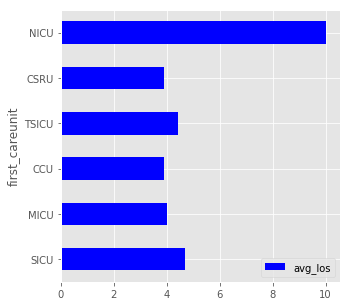

In [149]:
# Plot the distribution

diagnoses = data.set_index('first_careunit').plot.barh(y='avg_los', figsize=(5, 5), color='blue')

#plot = data.plot.pie(y='admission_count', figsize=(5, 5), legend=False, labels=data.admission_type)

#diagnoses = data.groupby(['admission_type', 'admission_count']).admission_count.count().plot.pie(autopct='%1.1f%%')

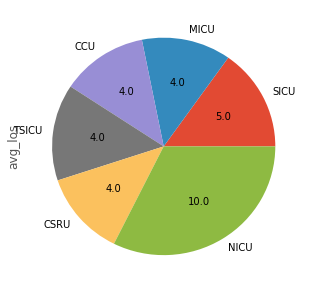

In [150]:
sizes = np.array(data.avg_los)

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

plot = data.plot.pie(y='avg_los', figsize=(5, 5), legend=False, labels=data.first_careunit, autopct=absolute_value)